# Benchmark postprocessing

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('tableau-colorblind10')
lockcolors = {'pthreads':'red','tournament':'orange', 'filter':'green', 'bakery':'blue', 'originalbakery':'royalblue', 'boulangerie':'cornflowerblue', 'tas':'black', 'ttas':'grey'}
plt.rcParams.update({'font.size': 16})

## Work benchmark

In [129]:
columns = ['numThreads', 'lockType', 'amountInCS', 'n', 'totalWorkload',  'avgTotalTime', 'avgTimeOutCS', 'avgTimeInCS', 'avgTimeAquiringLock']
df_work = pd.read_csv('output/work/work_50_1000_10000.csv', header=None, names=columns)
df_work

,numThreads,lockType,amountInCS,n,totalWorkload,avgTotalTime,avgTimeOutCS,avgTimeInCS,avgTimeAquiringLock
0,1,pthreads,0.5,1000,10000,24433.0,12144.7,12150.6,39.483
1,2,pthreads,0.5,1000,10000,31711.0,12214.6,12359.4,5605.390
2,4,pthreads,0.5,1000,10000,64007.8,14953.2,14468.2,33171.900
3,8,pthreads,0.5,1000,10000,120534.0,15355.9,14423.3,89304.000
4,16,pthreads,0.5,1000,10000,253938.0,15234.5,14436.8,222055.000
...,...,...,...,...,...,...,...,...,...
723,4,ttas,0.5,1000,10000,55829.2,14252.9,14900.9,26313.400
724,8,ttas,0.5,1000,10000,89450.1,14028.9,14080.5,60884.300
725,16,ttas,0.5,1000,10000,148251.0,13803.5,13835.2,120001.000
726,32,ttas,0.5,1000,10000,314768.0,16184.4,14844.1,282691.000


### Postprocessing and averaging the data

In [130]:
locks = list(pd.unique(df_work['lockType']))
numThreads = list(pd.unique(df_work['numThreads']))

df_work_grouped = df_work.groupby(['lockType', 'numThreads'])
df_work_avg = df_work_grouped.agg({'avgTotalTime': ['mean', 'std'], 'avgTimeAquiringLock': ['mean', 'std']})

# df_work_avg can be called with the following syntax
# df_work_avg[locktype][column][measure]
# e.g. df_work_avg['pthreads']['avgTotalTime']['mean']

### Average total time

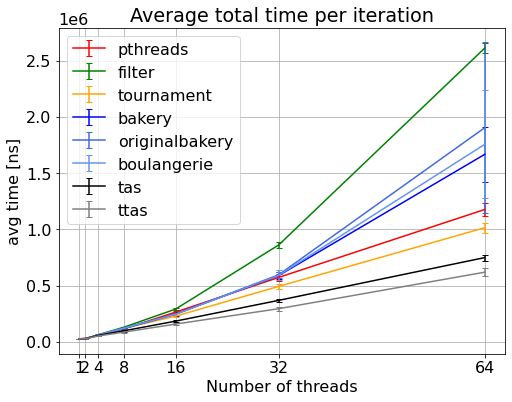

In [131]:
plt.figure(figsize=(8, 6))
for lock in locks:
    times = df_work_avg.loc[lock]['avgTotalTime']['mean']
    times_std = df_work_avg.loc[lock]['avgTotalTime']['std']
    plt.errorbar(numThreads, times, yerr=times_std, label=lock, capsize=3, color=lockcolors[lock])

plt.grid()
plt.legend()
plt.title('Average total time per iteration')
plt.ylabel('avg time [ns]')
plt.xlabel('Number of threads')
plt.xticks(numThreads)
plt.savefig('report/report/figures/work_total_50.png');

### Average time aquiring lock

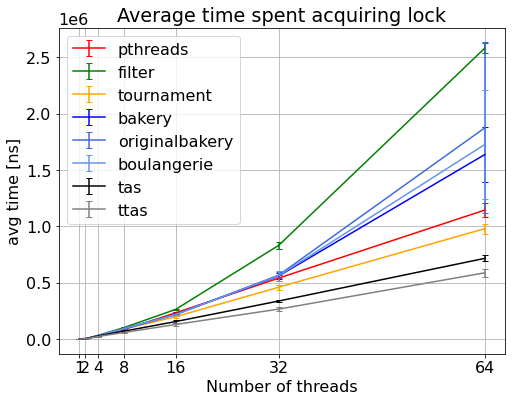

In [132]:
plt.figure(figsize=(8, 6))
for lock in locks:
    times = df_work_avg.loc[lock]['avgTimeAquiringLock']['mean']
    times_std = df_work_avg.loc[lock]['avgTimeAquiringLock']['std']
    plt.errorbar(numThreads, times, yerr=times_std, label=lock, capsize=3, color=lockcolors[lock])

plt.grid()
plt.legend()
plt.title('Average time spent acquiring lock')
plt.ylabel('avg time [ns]')
plt.xlabel('Number of threads')
plt.xticks(numThreads)
plt.savefig('report/report/figures/work_lock_50.png');

### all for 25% of work inside CS

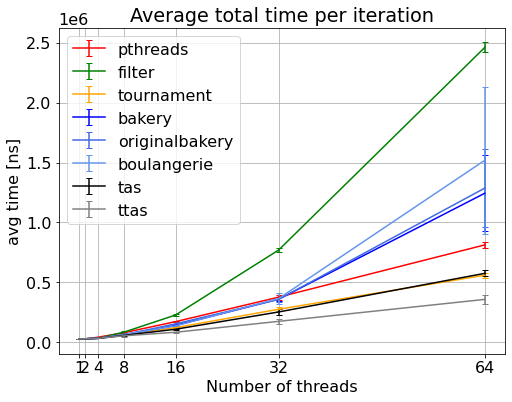

In [133]:
df_work25 = pd.read_csv('output/work/work_25_1000_10000.csv', header=None, names=columns)

df_work25_grouped = df_work25.groupby(['lockType', 'numThreads'])
df_work25_avg = df_work25_grouped.agg({'avgTotalTime': ['mean', 'std'], 'avgTimeAquiringLock': ['mean', 'std']})

plt.figure(figsize=(8, 6))
for lock in locks:
    times = df_work25_avg.loc[lock]['avgTotalTime']['mean']
    times_std = df_work25_avg.loc[lock]['avgTotalTime']['std']
    plt.errorbar(numThreads, times, yerr=times_std, label=lock, capsize=3, color=lockcolors[lock])

plt.grid()
plt.legend()
plt.title('Average total time per iteration')
plt.ylabel('avg time [ns]')
plt.xlabel('Number of threads')
plt.xticks(numThreads)
plt.savefig('report/report/figures/work_total_25.png');

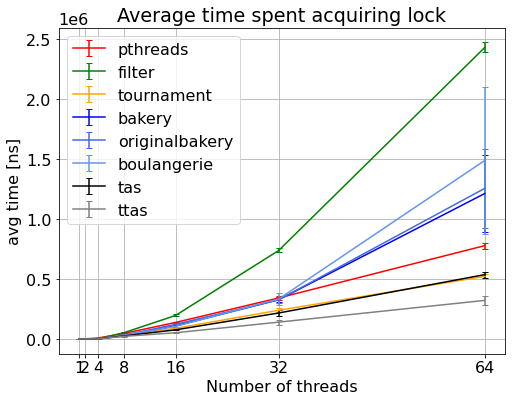

In [134]:
plt.figure(figsize=(8, 6))
for lock in locks:
    times = df_work25_avg.loc[lock]['avgTimeAquiringLock']['mean']
    times_std = df_work25_avg.loc[lock]['avgTimeAquiringLock']['std']
    plt.errorbar(numThreads, times, yerr=times_std, label=lock, capsize=3, color=lockcolors[lock])

plt.grid()
plt.legend()
plt.title('Average time spent acquiring lock')
plt.ylabel('avg time [ns]')
plt.xlabel('Number of threads')
plt.xticks(numThreads)
plt.savefig('report/report/figures/work_lock_25.png');

### all for 75% of work inside the CS

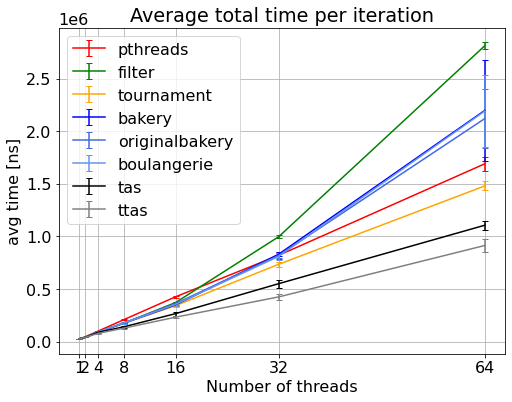

In [135]:
df_work75 = pd.read_csv('output/work/work_75_1000_10000.csv', header=None, names=columns)

df_work75_grouped = df_work75.groupby(['lockType', 'numThreads'])
df_work75_avg = df_work75_grouped.agg({'avgTotalTime': ['mean', 'std'], 'avgTimeAquiringLock': ['mean', 'std']})

plt.figure(figsize=(8, 6))
for lock in locks:
    times = df_work75_avg.loc[lock]['avgTotalTime']['mean']
    times_std = df_work75_avg.loc[lock]['avgTotalTime']['std']
    plt.errorbar(numThreads, times, yerr=times_std, label=lock, capsize=3, color=lockcolors[lock])

plt.grid()
plt.legend()
plt.title('Average total time per iteration')
plt.ylabel('avg time [ns]')
plt.xlabel('Number of threads')
plt.xticks(numThreads)
plt.savefig('report/report/figures/work_total_75.png');

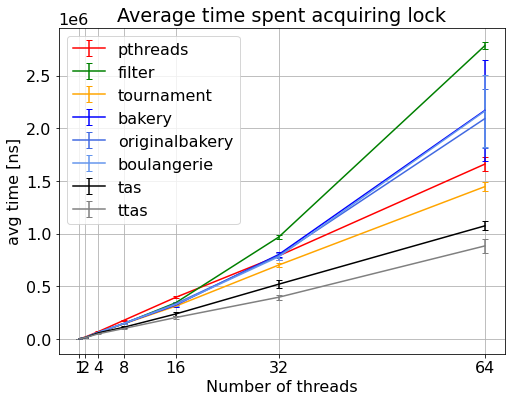

In [136]:
plt.figure(figsize=(8, 6))
for lock in locks:
    times = df_work75_avg.loc[lock]['avgTimeAquiringLock']['mean']
    times_std = df_work75_avg.loc[lock]['avgTimeAquiringLock']['std']
    plt.errorbar(numThreads, times, yerr=times_std, label=lock, capsize=3, color=lockcolors[lock])

plt.grid()
plt.legend()
plt.title('Average time spent acquiring lock')
plt.ylabel('avg time [ns]')
plt.xlabel('Number of threads')
plt.xticks(numThreads)
plt.savefig('report/report/figures/work_lock_75.png');

### With workload 0 to compare with throughput

/home/tobi/.local/lib/python3.8/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/home/tobi/.local/lib/python3.8/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


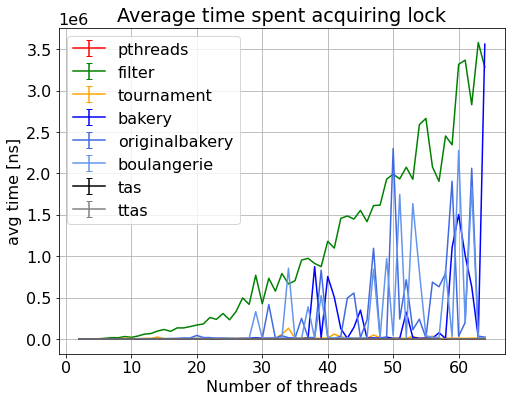

In [137]:
df_work0 = pd.read_csv('output/work/work_0.csv', header=None, names=columns)

numThreads_work0 = list(pd.unique(df_work0['numThreads']))

df_work0_grouped = df_work0.groupby(['lockType', 'numThreads'])
df_work0_avg = df_work0_grouped.agg({'avgTotalTime': ['mean', 'std'], 'avgTimeAquiringLock': ['mean', 'std']})

plt.figure(figsize=(8, 6))
for lock in locks:
    times = df_work0_avg.loc[lock]['avgTimeAquiringLock']['mean']
    times_std = df_work0_avg.loc[lock]['avgTimeAquiringLock']['std']
    plt.errorbar(numThreads_work0, times, yerr=times_std, label=lock, capsize=3, color=lockcolors[lock])

plt.grid()
plt.legend()
plt.title('Average time spent acquiring lock')
plt.ylabel('avg time [ns]')
plt.xlabel('Number of threads')
plt.savefig('report/report/figures/work_lock_75.png');

## Throughput processing

In [138]:
columns_TP = ['numThreads', 'lockType', 'CountAqu']
for i in range(64):
    columns_TP.append('Thread' + str(i))
df_TP = pd.read_csv('output/throughput/throughput.csv', header=None, names=columns_TP)
df_TP


,numThreads,lockType,CountAqu,Thread0,Thread1,Thread2,Thread3,Thread4,Thread5,Thread6,...,Thread54,Thread55,Thread56,Thread57,Thread58,Thread59,Thread60,Thread61,Thread62,Thread63
0,2,pthreads,15154520,7769486,7385034,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,pthreads,8783264,2413596,2004523,2337696.0,2027449.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8,pthreads,10850995,1278567,1120646,1809716.0,1270155.0,1214011.0,1512488.0,1278744.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,16,pthreads,11107448,802524,794416,760680.0,642711.0,691979.0,734611.0,672709.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,32,pthreads,10161694,346436,287979,230044.0,335354.0,235794.0,362761.0,344953.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733,4,ttas,2685262,585819,552045,750916.0,796482.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
734,8,ttas,1969869,124164,118495,152227.0,232040.0,671320.0,127874.0,285502.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
735,16,ttas,2211502,179831,104782,182631.0,66969.0,178843.0,178268.0,33457.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
736,32,ttas,692389,7071,154273,70021.0,141965.0,67200.0,153928.0,1375.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Postprocessing and averaging the data

In [139]:
time = 1 #runtime per run in seconds.
numThreads2 = list(pd.unique(df_TP['numThreads']))

df_TP_grouped = df_TP.groupby(['lockType', 'numThreads'])
df_TP_avg = df_TP_grouped.agg({'CountAqu': ['mean', 'std']})

### Average Number of times a lock has been aquired by a thread

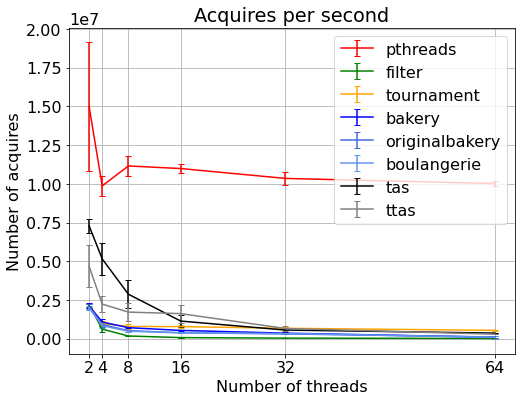

In [140]:
plt.figure(figsize=(8, 6))
for lock in locks:
        aqus_p_s = df_TP_avg.loc[lock]['CountAqu']['mean'].div(time)
        stds = df_TP_avg.loc[lock]['CountAqu']['std']
        plt.errorbar(numThreads2, aqus_p_s, stds, label=lock, capsize=3, color=lockcolors[lock])

plt.grid()
plt.legend()
plt.title('Acquires per second')
plt.ylabel('Number of acquires')
plt.xticks(numThreads2)
plt.xlabel('Number of threads')
plt.savefig('report/report/figures/throughput.png');

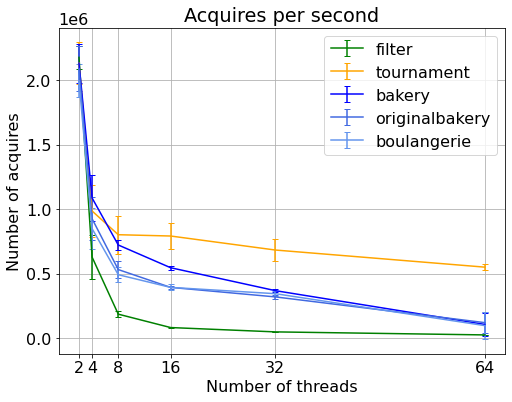

In [141]:
#again for the homemade locks
plt.figure(figsize=(8, 6))
for lock in locks:
        if lock == 'pthreads' or lock == 'tas' or lock == 'ttas':
            pass
        else:
            aqus_p_s = df_TP_avg.loc[lock]['CountAqu']['mean'].div(time)
            stds = df_TP_avg.loc[lock]['CountAqu']['std']
            plt.errorbar(numThreads2, aqus_p_s, stds, label=lock, capsize=3, color=lockcolors[lock])

plt.grid()
plt.legend()
plt.title('Acquires per second')
plt.ylabel('Number of acquires')
plt.xticks(numThreads2)
plt.xlabel('Number of threads')
plt.savefig('report/report/figures/throughput_homemade.png');

#### average time to aquire the lock to compare with the work benchmark

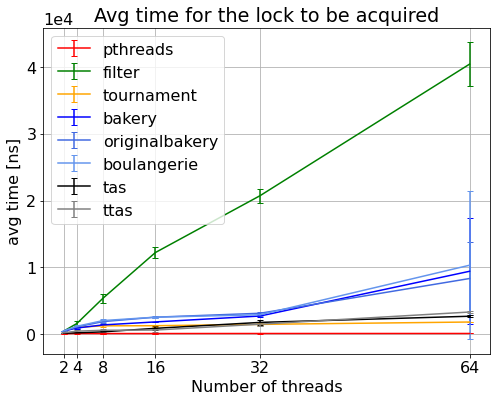

In [142]:
#the std is kind of a pain here, so we plot as errorbars the percental value that fits the percental std from above
plt.figure(figsize=(8, 6))
for lock in locks:
            aqus_p_s = df_TP_avg.loc[lock]['CountAqu']['mean'].div(time)
            stds = df_TP_avg.loc[lock]['CountAqu']['std']
            rel_std = stds / aqus_p_s
            times = 10**9 * 1 / aqus_p_s
            plt.errorbar(numThreads2, times, yerr=times * rel_std, label=lock, capsize=3, color=lockcolors[lock])

plt.grid()
plt.legend()
plt.title('Avg time for the lock to be acquired')
plt.ylabel('avg time [ns]')
plt.xlabel('Number of threads')
plt.xticks(numThreads2)
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.savefig('report/report/figures/times_throughput.png');

### Fairness analysis

In [ ]:
df_TP['avg_aqus'] = df_TP['CountAqu'] / df_TP['numThreads']
keylist = []
for i in range(64): #calculating fairness measures (fm)
    keylist.append('Thread' + str(i) + 'fm')
    df_TP[keylist[i]] = ((df_TP['Thread' + str(i)] - df_TP['avg_aqus']) / df_TP['avg_aqus']).abs()
df_TP['avg_fm'] = df_TP[keylist].mean(axis=1,skipna=True)

df_TP_grouped = df_TP.groupby(['lockType', 'numThreads'])
df_TP_avg_fair = df_TP_grouped.agg({'avg_fm': ['mean', 'std']})

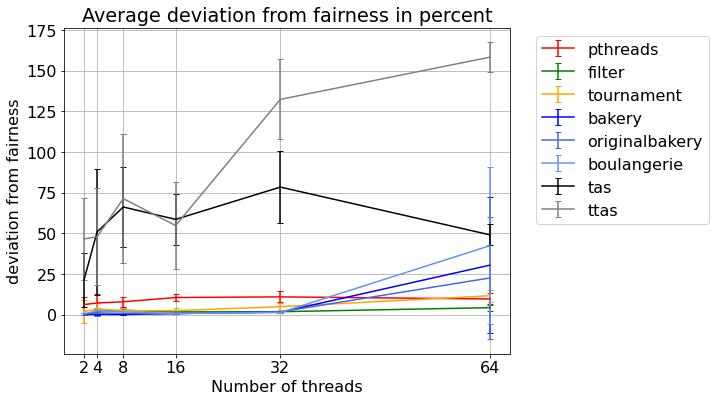

In [ ]:
plt.figure(figsize=(8, 6))
for lock in locks:
        fm = df_TP_avg_fair.loc[lock]['avg_fm']['mean']
        stds = df_TP_avg_fair.loc[lock]['avg_fm']['std']
        plt.errorbar(numThreads2, fm * 100, stds * 100, label=lock, capsize=3, color=lockcolors[lock])

plt.grid()
plt.legend(bbox_to_anchor=[1.04,1])
plt.title('Average deviation from fairness in percent')
plt.ylabel('deviation from fairness')
plt.xlabel('Number of threads')
plt.xticks(numThreads2)
plt.savefig('report/report/figures/fairness.png',bbox_inches='tight');

### comparing to fence for the case of the bakery

#### throughput

/home/tobi/.local/lib/python3.8/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/home/tobi/.local/lib/python3.8/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


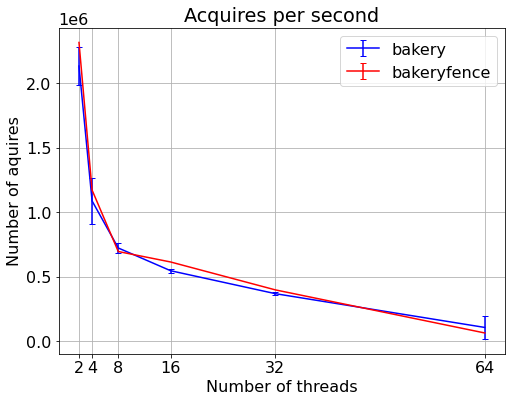

In [ ]:

plt.figure(figsize=(8, 6))
lock = 'bakery'
aqus_p_s = df_TP_avg.loc[lock]['CountAqu']['mean'].div(time)
stds = df_TP_avg.loc[lock]['CountAqu']['std']
plt.errorbar(numThreads2, aqus_p_s, stds, label=lock, capsize=3, color=lockcolors[lock])

df_TP_f = pd.read_csv('output/throughput/throughput_fence.csv', header=None, names=columns_TP)

df_TP_f_grouped = df_TP_f.groupby(['lockType', 'numThreads'])
df_TP_f_avg = df_TP_f_grouped.agg({'CountAqu': ['mean', 'std']})
lock = 'bakeryfence'
aqus_p_s_f = df_TP_f_avg.loc[lock]['CountAqu']['mean'].div(time)
stds_f = df_TP_f_avg.loc[lock]['CountAqu']['std']
plt.errorbar(numThreads2, aqus_p_s_f, stds_f, label=lock, capsize=3, color='red')

plt.grid()
plt.legend()
plt.title('Acquires per second')
plt.ylabel('Number of aquires')
plt.xlabel('Number of threads')
plt.xticks(numThreads2);


#### work

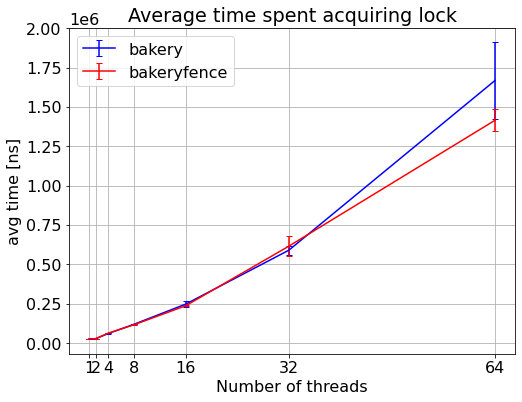

In [ ]:
df_w_f = pd.read_csv('output/work/work_fence.csv', header=None, names=columns)
df_w_f_grouped = df_w_f.groupby(['lockType', 'numThreads'])
df_w_f_avg = df_w_f_grouped.agg({'avgTotalTime': ['mean', 'std'], 'avgTimeAquiringLock': ['mean', 'std']})

plt.figure(figsize=(8, 6))

lock = 'bakery'
times = df_work_avg.loc[lock]['avgTotalTime']['mean']
stds_times = df_work_avg.loc[lock]['avgTotalTime']['std']
plt.errorbar(numThreads, times, stds_times, label=lock, capsize=3, color=lockcolors[lock])

lock = 'bakeryfence'
times_f = df_w_f_avg.loc[lock]['avgTotalTime']['mean'].div(time)
stds_times_f = df_w_f_avg.loc[lock]['avgTotalTime']['std']
plt.errorbar(numThreads, times_f, stds_times_f, label=lock, capsize=3, color='red')

plt.grid()
plt.legend()
plt.title('Average time spent acquiring lock')
plt.ylabel('avg time [ns]')
plt.xlabel('Number of threads')
plt.xticks(numThreads)
plt.savefig('report/report/figures/work_o3.png');

### Postprocessing for -o3 flag test on the example of the bakery

#### throughput

/home/tobi/.local/lib/python3.8/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/home/tobi/.local/lib/python3.8/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


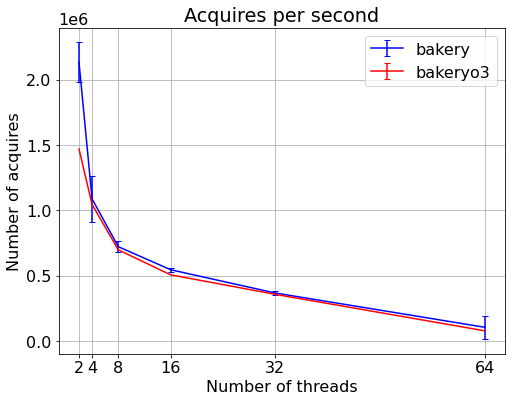

In [ ]:
plt.figure(figsize=(8, 6))
lock = 'bakery'
aqus_p_s = df_TP_avg.loc[lock]['CountAqu']['mean'].div(time)
stds = df_TP_avg.loc[lock]['CountAqu']['std']
plt.errorbar(numThreads2, aqus_p_s, stds, label=lock, capsize=3, color=lockcolors[lock])

df_TP_o3 = pd.read_csv('output/throughput/throughput_o3.csv', header=None, names=columns_TP)

df_TP_o3_grouped = df_TP_o3.groupby(['lockType', 'numThreads'])
df_TP_o3_avg = df_TP_o3_grouped.agg({'CountAqu': ['mean', 'std']})

aqus_p_s_o3 = df_TP_o3_avg.loc[lock]['CountAqu']['mean'].div(time)
stds_o3 = df_TP_o3_avg.loc[lock]['CountAqu']['std']
plt.errorbar(numThreads2, aqus_p_s_o3, stds_o3, label=lock + 'o3', capsize=3, color='red')

plt.grid()
plt.legend()
plt.title('Acquires per second')
plt.ylabel('Number of acquires')
plt.xlabel('Number of threads')
plt.xticks(numThreads2)
plt.savefig('report/report/figures/throughput_o3.png');

#### work

/home/tobi/.local/lib/python3.8/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/home/tobi/.local/lib/python3.8/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


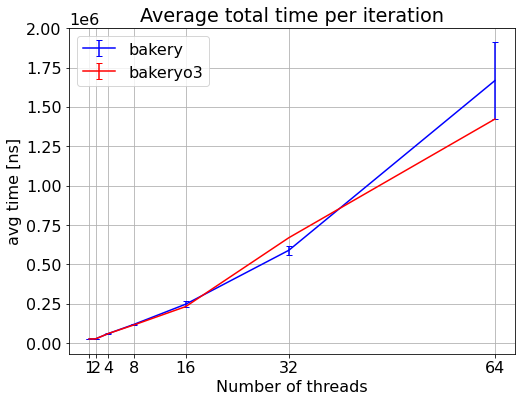

In [ ]:
plt.figure(figsize=(8, 6))
lock = 'bakery'
times = df_work_avg.loc[lock]['avgTotalTime']['mean'].div(time)
stds = df_work_avg.loc[lock]['avgTotalTime']['std']
plt.errorbar(numThreads, times, stds, label=lock, capsize=3, color=lockcolors[lock])

df_w_o3 = pd.read_csv('output/work/work_o3.csv', header=None, names=columns)

df_w_o3_grouped = df_w_o3.groupby(['lockType', 'numThreads'])
df_w_o3_avg = df_w_o3_grouped.agg({'avgTotalTime': ['mean', 'std']})

times_o3 = df_w_o3_avg.loc[lock]['avgTotalTime']['mean'].div(time)
stds_o3 = df_w_o3_avg.loc[lock]['avgTotalTime']['std']
plt.errorbar(numThreads, times_o3, stds_o3, label=lock + 'o3', capsize=3, color='red')

plt.grid()
plt.legend()
plt.title('Average total time per iteration')
plt.ylabel('avg time [ns]')
plt.xlabel('Number of threads')
plt.xticks(numThreads)
plt.savefig('report/report/figures/work_o3.png');

## postprocessing for all corecounts

#### even numbers of cores

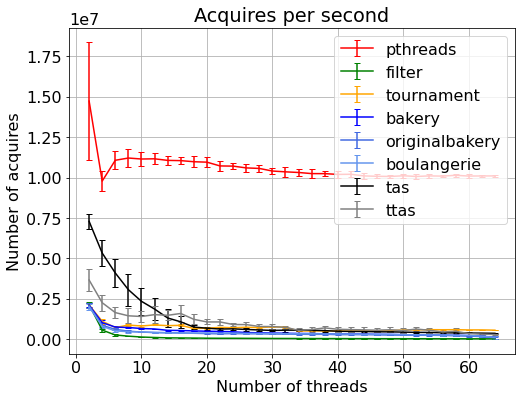

In [ ]:
df_TP_even = pd.read_csv('output/throughput/throughput_even.csv', header=None, names=columns_TP)

df_TP_even_grouped = df_TP_even.groupby(['lockType', 'numThreads'])
df_TP_even_avg = df_TP_even_grouped.agg({'CountAqu': ['mean', 'std']})

numThreads_even = list(pd.unique(df_TP_even['numThreads']))

plt.figure(figsize=(8, 6))
for lock in locks:
        aqus_p_s = df_TP_even_avg.loc[lock]['CountAqu']['mean'].div(time)
        stds = df_TP_even_avg.loc[lock]['CountAqu']['std']
        plt.errorbar(numThreads_even, aqus_p_s, stds, label=lock, capsize=3, color=lockcolors[lock])

plt.grid()
plt.legend()
plt.title('Acquires per second')
plt.ylabel('Number of acquires')
plt.xlabel('Number of threads')
plt.savefig('report/report/figures/throughput_even.png');

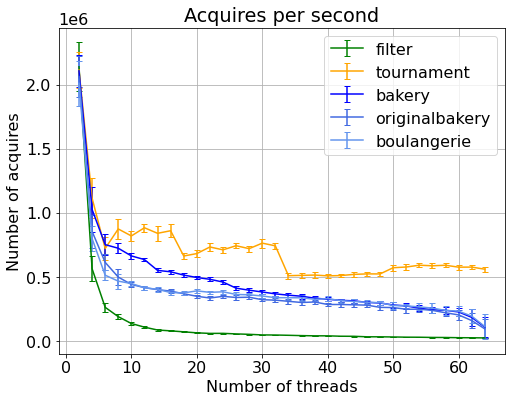

In [ ]:
plt.figure(figsize=(8, 6))
for lock in locks:
        if lock == 'pthreads' or lock == 'tas' or lock == 'ttas':
            continue
        aqus_p_s = df_TP_even_avg.loc[lock]['CountAqu']['mean'].div(time)
        stds = df_TP_even_avg.loc[lock]['CountAqu']['std']
        plt.errorbar(numThreads_even, aqus_p_s, stds, label=lock, capsize=3, color=lockcolors[lock])

plt.grid()
plt.legend()
plt.title('Acquires per second')
plt.ylabel('Number of acquires')
plt.xlabel('Number of threads')
plt.savefig('report/report/figures/throughput_even_homemade.png');

#### all numbers of cores

/home/tobi/.local/lib/python3.8/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/home/tobi/.local/lib/python3.8/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


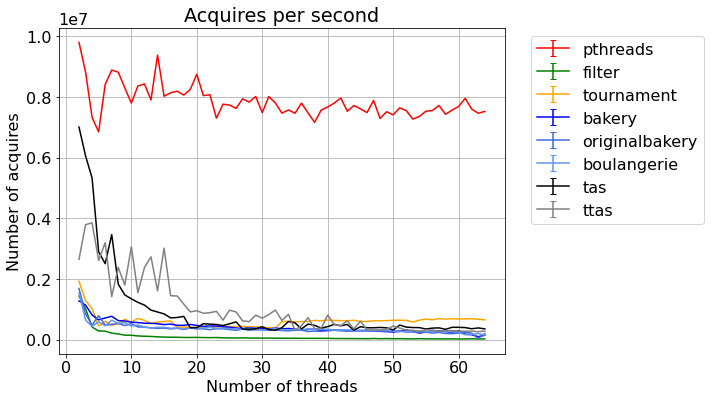

In [ ]:
df_TP_all = pd.read_csv('output/throughput/throughput_every_num.csv', header=None, names=columns_TP)

df_TP_all_grouped = df_TP_all.groupby(['lockType', 'numThreads'])
df_TP_all_avg = df_TP_all_grouped.agg({'CountAqu': ['mean', 'std']})

numThreads_all = list(pd.unique(df_TP_all['numThreads']))

plt.figure(figsize=(8, 6))
for lock in locks:
        aqus_p_s = df_TP_all_avg.loc[lock]['CountAqu']['mean'].div(time)
        stds = df_TP_all_avg.loc[lock]['CountAqu']['std']
        plt.errorbar(numThreads_all, aqus_p_s, stds, label=lock, capsize=3, color=lockcolors[lock])

plt.grid()
plt.legend(bbox_to_anchor=[1.04,1])
plt.title('Acquires per second')
plt.ylabel('Number of acquires')
plt.xlabel('Number of threads')
plt.savefig('report/report/figures/throughput_all.png', bbox_inches='tight');

## Postprocessing for ARM

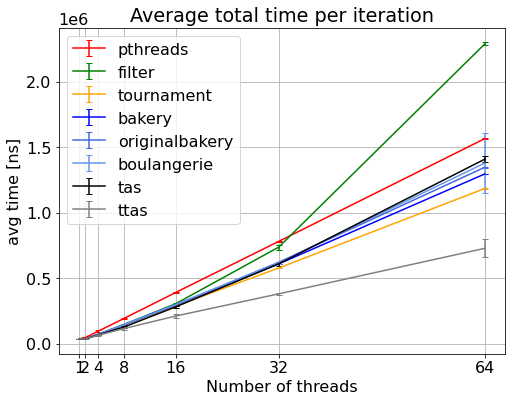

In [ ]:
df_w_arm = pd.read_csv('output/work/work_arm_50_1000_10000.csv', header=None, names=columns)

df_w_arm_grouped = df_w_arm.groupby(['lockType', 'numThreads'])
df_w_arm_avg = df_w_arm_grouped.agg({'avgTotalTime': ['mean', 'std'], 'avgTimeAquiringLock': ['mean', 'std']})

plt.figure(figsize=(8, 6))
for lock in locks:
    times = df_w_arm_avg.loc[lock]['avgTotalTime']['mean']
    times_std = df_w_arm_avg.loc[lock]['avgTotalTime']['std']
    plt.errorbar(numThreads, times, yerr=times_std, label=lock, capsize=3, color=lockcolors[lock])

plt.grid()
plt.legend()
plt.title('Average total time per iteration')
plt.ylabel('avg time [ns]')
plt.xlabel('Number of threads')
plt.xticks(numThreads)
plt.savefig('report/report/figures/work_arm_total_50.png');

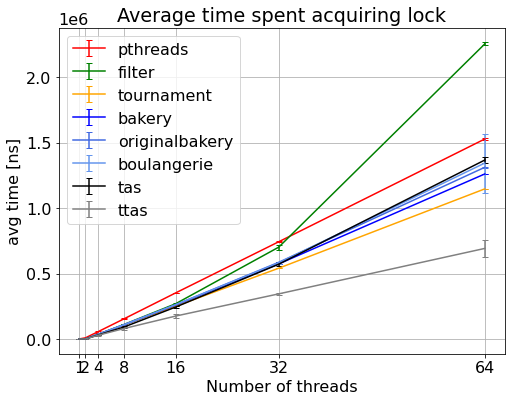

In [ ]:
plt.figure(figsize=(8, 6))
for lock in locks:
    times = df_w_arm_avg.loc[lock]['avgTimeAquiringLock']['mean']
    times_std = df_w_arm_avg.loc[lock]['avgTimeAquiringLock']['std']
    plt.errorbar(numThreads, times, yerr=times_std, label=lock, capsize=3, color=lockcolors[lock])

plt.grid()
plt.legend()
plt.title('Average time spent acquiring lock')
plt.ylabel('avg time [ns]')
plt.xlabel('Number of threads')
plt.xticks(numThreads)
plt.savefig('report/report/figures/work_arm_lock_50.png');

### Plausibility check

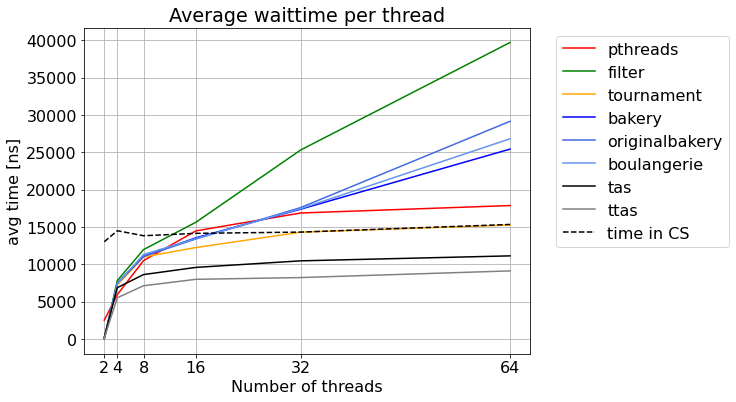

In [ ]:
plt.figure(figsize=(8, 6))

df_work_grouped_CS = df_work.groupby(['lockType', 'numThreads'])
df_work_avg_CS = df_work_grouped_CS.agg({'avgTimeInCS': ['mean', 'std']})

for lock in locks:
    times = df_work_avg.loc[lock]['avgTimeAquiringLock']['mean']
    aqus_p_s = df_TP_avg.loc[lock]['CountAqu']['mean'].div(time)
    times_TP = 10**9 * 1 / aqus_p_s
    waittime = times[1:] - times_TP
    plt.plot(numThreads2, waittime / numThreads2, label=lock, color=lockcolors[lock])
times_CS = df_work_avg_CS.loc[lock]['avgTimeInCS']['mean']#some arbitrary lock, same for all locks
plt.plot(numThreads2, times_CS[1:], label='time in CS', color='black', linestyle='--')

plt.grid()
plt.legend(bbox_to_anchor=[1.04,1])
plt.title('Average waittime per thread')
plt.ylabel('avg time [ns]')
plt.xlabel('Number of threads')
plt.xticks(numThreads2);

### Work benchmark for high workload (low congestion)

/home/tobi/.local/lib/python3.8/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/home/tobi/.local/lib/python3.8/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


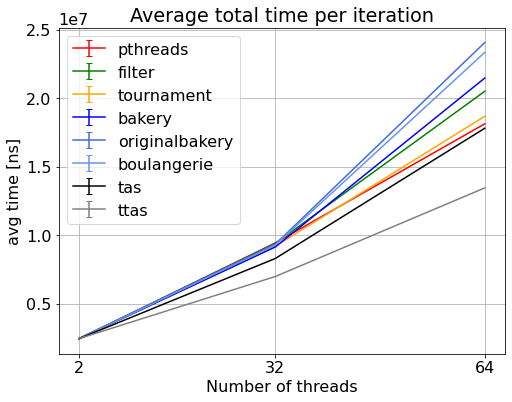

In [ ]:
df_work_high = pd.read_csv('output/work/work_10_100_1000000.csv', header=None, names=columns)

numThreads_high = list(pd.unique(df_work_high['numThreads']))

df_work_h_grouped = df_work_high.groupby(['lockType', 'numThreads'])
df_work_h_avg = df_work_h_grouped.agg({'avgTotalTime': ['mean', 'std'], 'avgTimeAquiringLock': ['mean', 'std']})

plt.figure(figsize=(8, 6))
for lock in locks:
    times = df_work_h_avg.loc[lock]['avgTotalTime']['mean']
    times_std = df_work_h_avg.loc[lock]['avgTotalTime']['std']
    plt.errorbar(numThreads_high, times, yerr=times_std, label=lock, capsize=3, color=lockcolors[lock])

plt.grid()
plt.legend()
plt.title('Average total time per iteration')
plt.ylabel('avg time [ns]')
plt.xlabel('Number of threads')
plt.xticks(numThreads_high)
plt.savefig('report/report/figures/work_total_1m_10.png');

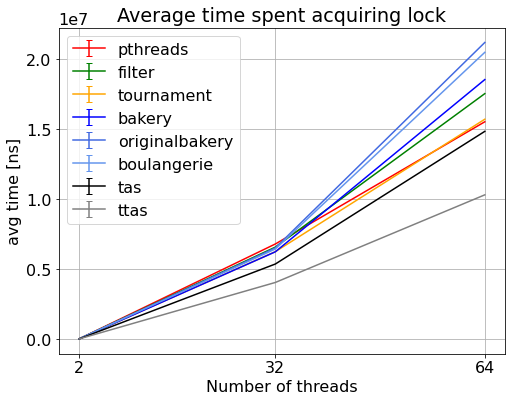

In [ ]:
plt.figure(figsize=(8, 6))
for lock in locks:
    times = df_work_h_avg.loc[lock]['avgTimeAquiringLock']['mean']
    times_std = df_work_h_avg.loc[lock]['avgTimeAquiringLock']['std']
    plt.errorbar(numThreads_high, times, yerr=times_std, label=lock, capsize=3, color=lockcolors[lock])

plt.grid()
plt.legend()
plt.title('Average time spent acquiring lock')
plt.ylabel('avg time [ns]')
plt.xlabel('Number of threads')
plt.xticks(numThreads_high)
plt.savefig('report/report/figures/work_lock_1m_10.png');

#### with 1%

/home/tobi/.local/lib/python3.8/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/home/tobi/.local/lib/python3.8/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


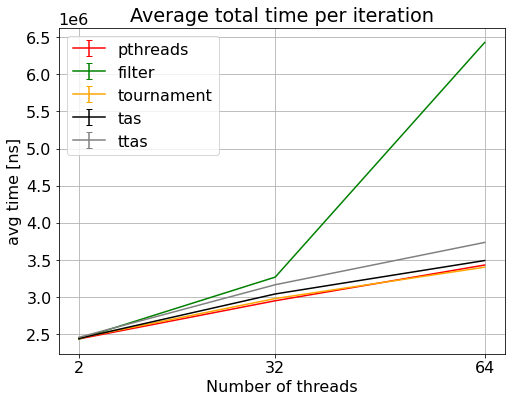

In [ ]:
df_work_high = pd.read_csv('output/work/work_1_100_1000000.csv', header=None, names=columns)

numThreads_high = list(pd.unique(df_work_high['numThreads']))

df_work_h_grouped = df_work_high.groupby(['lockType', 'numThreads'])
df_work_h_avg = df_work_h_grouped.agg({'avgTotalTime': ['mean', 'std'], 'avgTimeAquiringLock': ['mean', 'std']})

plt.figure(figsize=(8, 6))
for lock in locks:
    if lock == 'bakery' or lock == 'originalbakery' or lock == 'boulangerie':
        continue
    times = df_work_h_avg.loc[lock]['avgTotalTime']['mean']
    times_std = df_work_h_avg.loc[lock]['avgTotalTime']['std']
    plt.errorbar(numThreads_high, times, yerr=times_std, label=lock, capsize=3, color=lockcolors[lock])

plt.grid()
plt.legend()
plt.title('Average total time per iteration')
plt.ylabel('avg time [ns]')
plt.xlabel('Number of threads')
plt.xticks(numThreads_high)
plt.savefig('report/report/figures/work_total_1m_1.png');

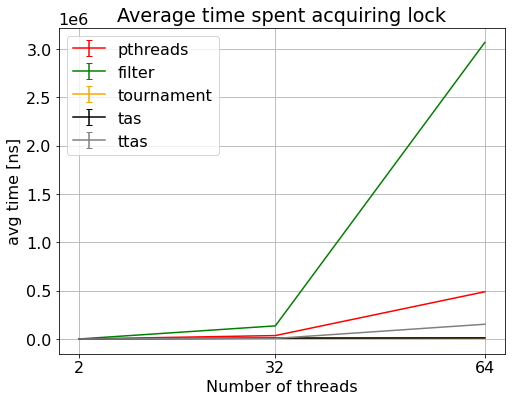

In [ ]:
plt.figure(figsize=(8, 6))
for lock in locks:
    if lock == 'bakery' or lock == 'originalbakery' or lock == 'boulangerie':
        continue
    times = df_work_h_avg.loc[lock]['avgTimeAquiringLock']['mean']
    times_std = df_work_h_avg.loc[lock]['avgTimeAquiringLock']['std']
    plt.errorbar(numThreads_high, times, yerr=times_std, label=lock, capsize=3, color=lockcolors[lock])

plt.grid()
plt.legend()
plt.title('Average time spent acquiring lock')
plt.ylabel('avg time [ns]')
plt.xlabel('Number of threads')
plt.xticks(numThreads_high)
plt.savefig('report/report/figures/work_lock_1m_1.png');

### Calculating congestion for different amounts of work inside the CS

<Figure size 576x432 with 0 Axes>

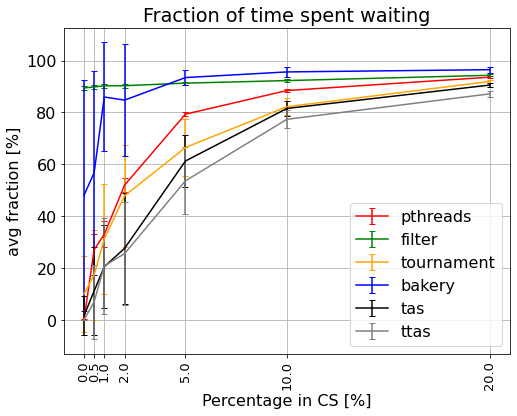

In [ ]:
plt.figure(figsize=(8, 6))
df_work_d = pd.read_csv('output/work/work_diff.csv', header=None, names=columns)

percentages = list(pd.unique(df_work_d['amountInCS'] * 100))

df_work_d['fraction_waiting'] = df_work_d['avgTimeAquiringLock'] / df_work_d['avgTotalTime']

df_work_d_grouped = df_work_d.groupby(['lockType', 'amountInCS'])
df_work_d_avg = df_work_d_grouped.agg({'fraction_waiting': ['mean', 'std']})

plt.figure(figsize=(8, 6))
for lock in locks:
    if lock == 'originalbakery' or lock == 'boulangerie':
        continue
    fraction_waiting = df_work_d_avg.loc[lock]['fraction_waiting']['mean']
    fraction_waiting_std = df_work_d_avg.loc[lock]['fraction_waiting']['std']
    plt.errorbar(percentages, 100 * fraction_waiting, yerr=100 * fraction_waiting_std, capsize=3, label=lock, color=lockcolors[lock])

plt.grid()
plt.legend()
plt.title('Fraction of time spent waiting')
plt.ylabel('avg fraction [%]')
plt.xlabel('Percentage in CS [%]')
plt.xticks(percentages, rotation=90, fontsize=13)
plt.savefig('report/report/figures/work_diff.png');